In [1]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset

netflix_overall=pd.read_csv("dataset/netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Missing data

for i in netflix_overall.columns:
    null_rate = netflix_overall[i].isna().sum() / len(netflix_overall) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [5]:
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [7]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

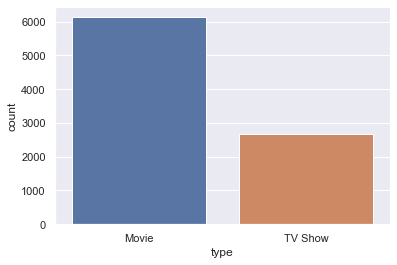

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall)

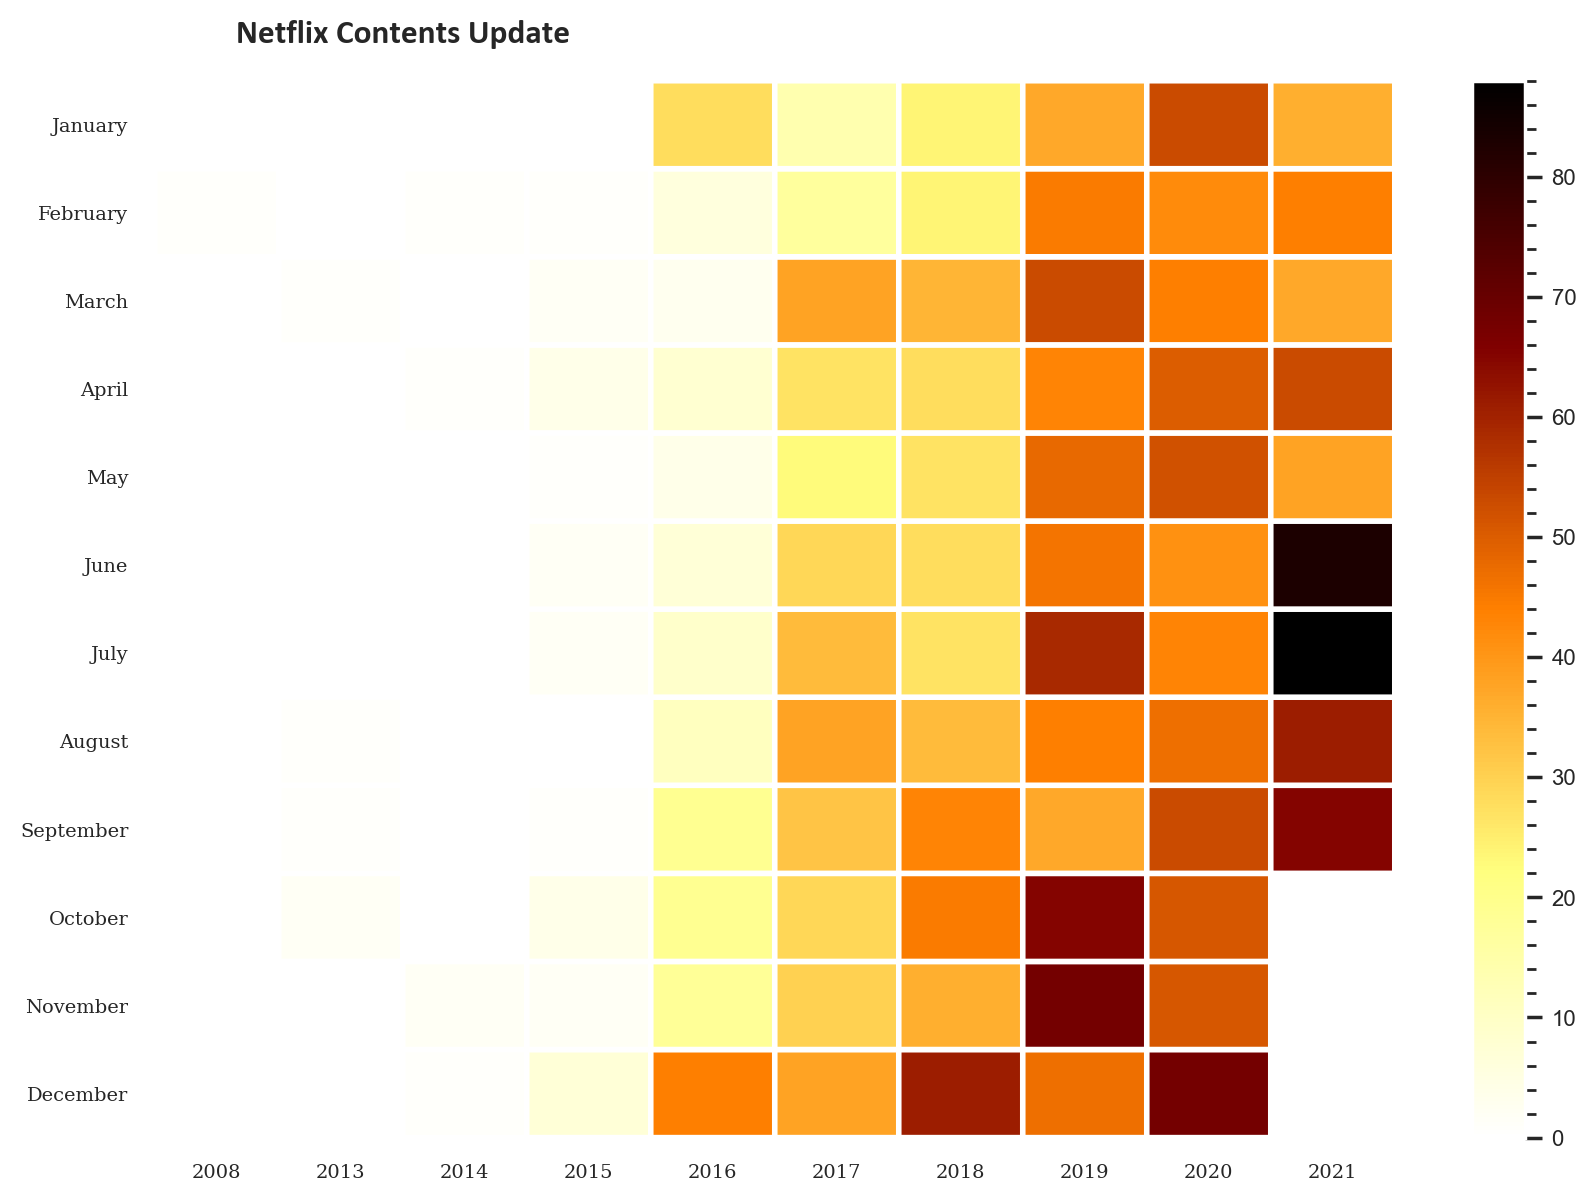

In [9]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [14]:
display(df.sum().sum())

2666.0

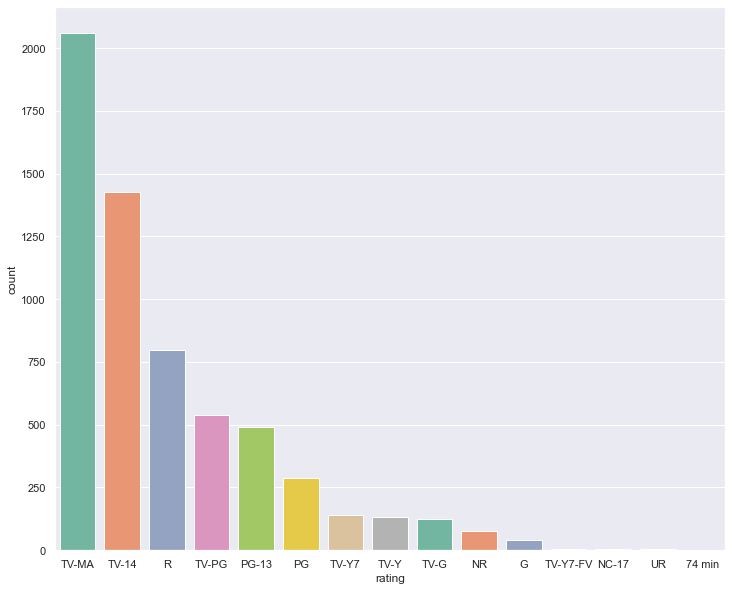

In [23]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

In [27]:
imdb_ratings=pd.read_csv('dataset/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('dataset/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(85852, 4)

In [28]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [33]:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

In [34]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,865
India,718
United Kingdom,119
Canada,57
Philippines,50
Spain,41
Indonesia,38
South Korea,38
France,37
Nigeria,31


In [35]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

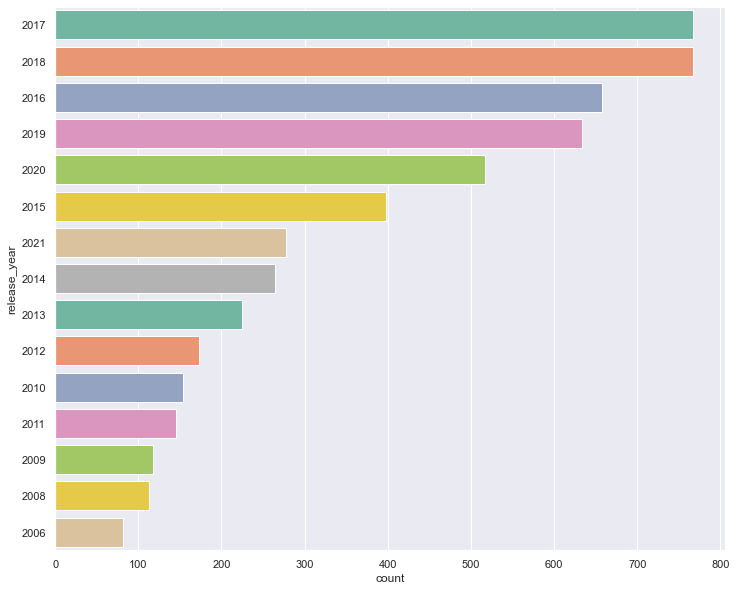

In [36]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

In [37]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_20288/3884906968.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'India')]

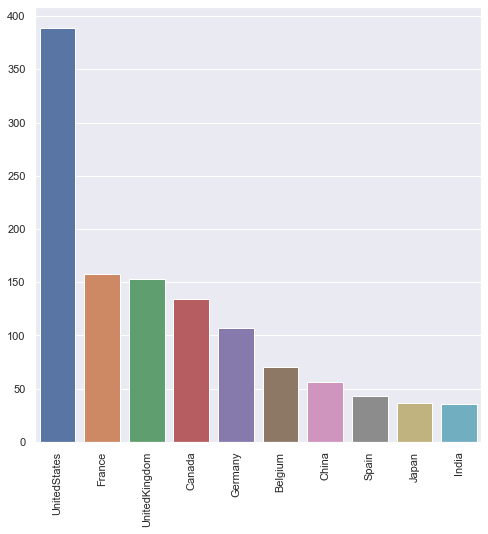

In [39]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

In [41]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

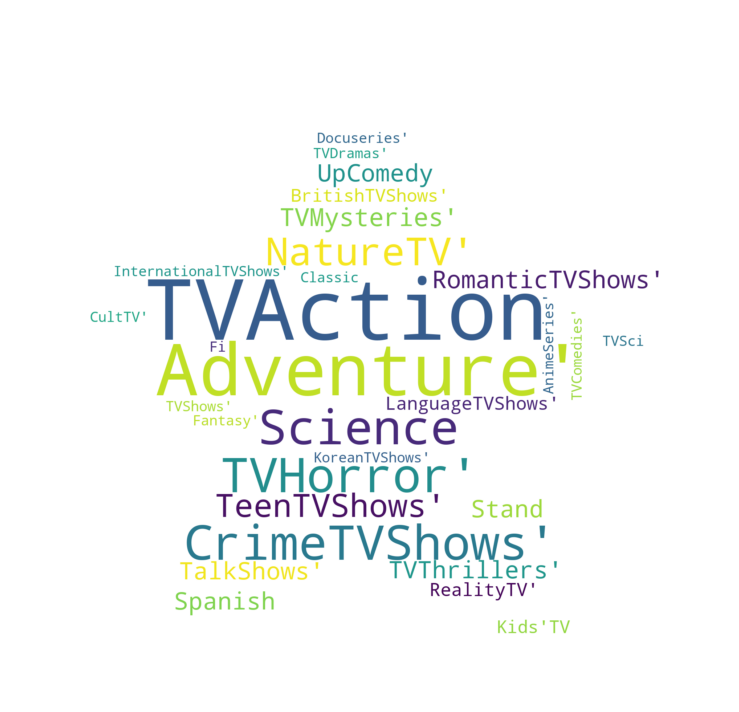

In [56]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
mask = np.array(Image.open('star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

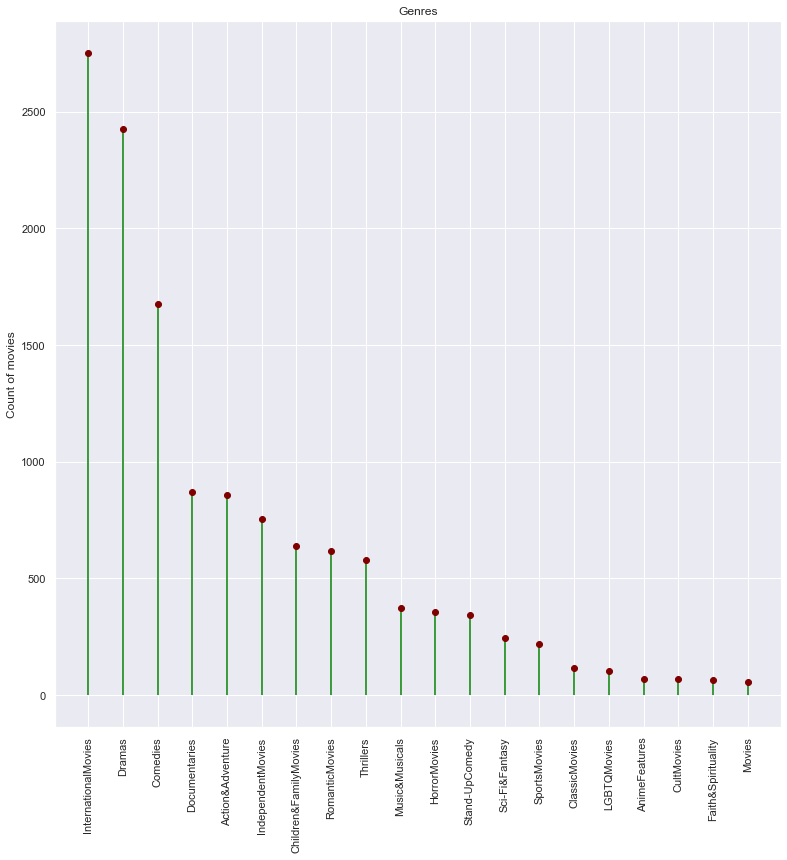

<Figure size 720x720 with 0 Axes>

In [44]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

In [45]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_20288/38362248.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

Text(0, 0.5, 'Arrival delay (in minutes)')

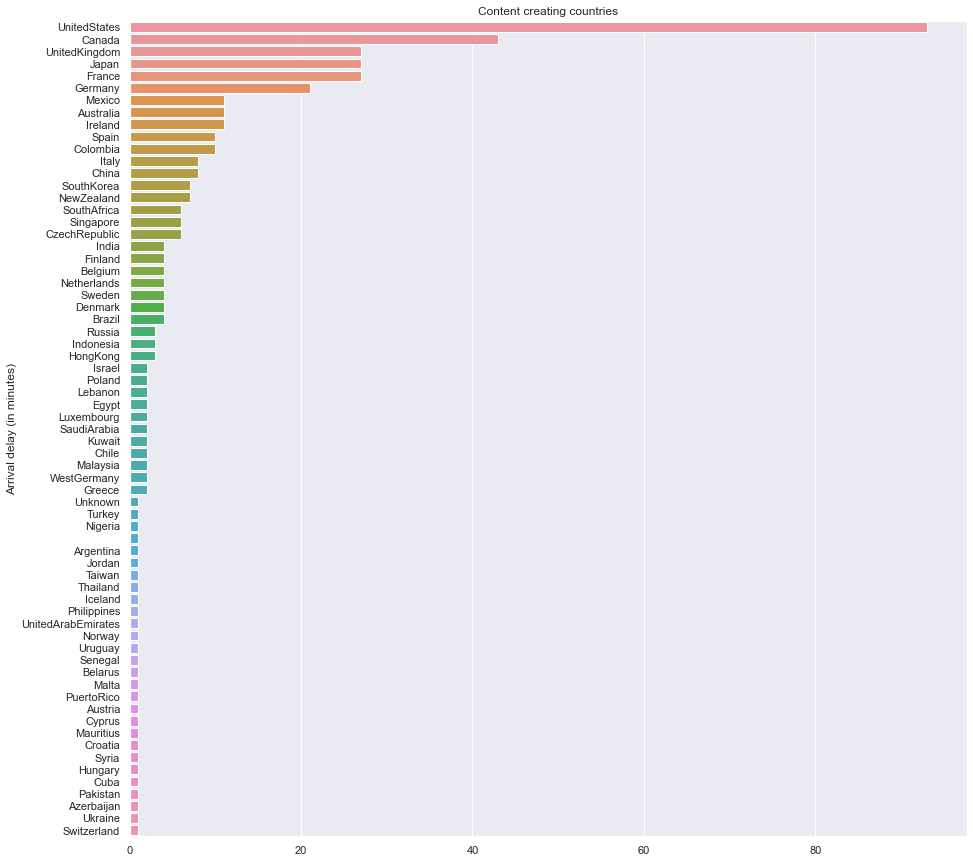

In [47]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

In [48]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_20288/315267630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_20288/315267630.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_20288/4291655225.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

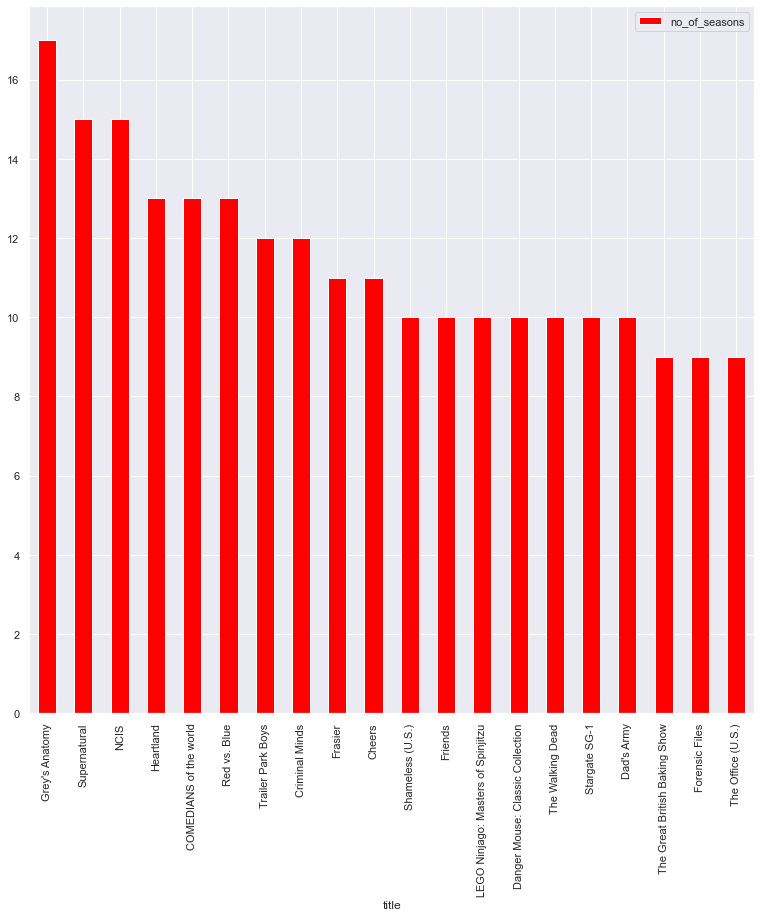

In [52]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

In [53]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

In [54]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

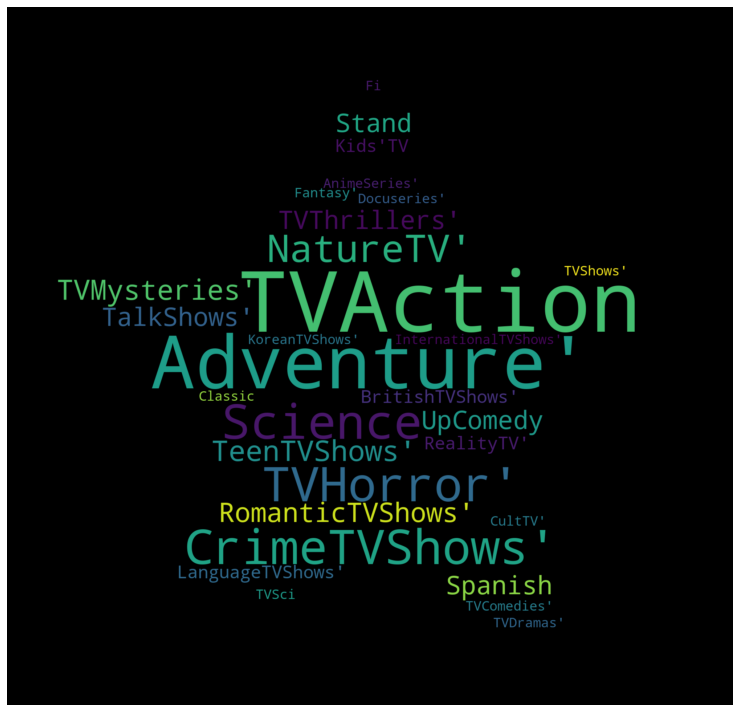

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

mask=np.array(Image.open('star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="black",mask=mask).generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

oldest_us_series=us_series_data.sort_values(by='release_year')[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

In [61]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

In [62]:
netflix_fr=netflix_overall[netflix_overall['country']=='France']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

In [65]:
newest_fr_series=netflix_fr.sort_values(by='release_year', ascending=False)[0:20]

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']]))
                     ])
fig.show()

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [68]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [69]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [70]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [71]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [72]:
get_recommendations('Mortel')

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
4511         Edgar Rice Burroughs' Tarzan and Jane
6749                             Figures of Speech
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

In [73]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [74]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [75]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [76]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [77]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [78]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [80]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [81]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [82]:
get_recommendations_new('PK', cosine_sim2)

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
6907                             Haapus
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
195     EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [83]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object

In [84]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2982                                        Find Yourself
1038                                       Dancing Angels
7438                     Melodies of Life - Born This Way
3293                                        Little Things
6508    Club Friday To Be Continued - My Beautiful Tomboy
7872                                           Rishta.com
3463                                      College Romance
4171                                    The Perfect Match
4487                                 Accidentally in Love
5703                                          Refresh Man
Name: title, dtype: object